In [196]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import qutip as qt
import scipy as sp
from scipy import linalg
import matplotlib
import matplotlib.pylab as plt
import krotov
import os.path
import random
from matplotlib import rc
from cycler import cycler
import time
import pandas as pd
from datetime import date
from matplotlib.animation import FuncAnimation

from Ps_library_temp import *
from Hamiltonian_library import *
from krotov_custom_library import *
from config import *
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size':20})
rc('text', usetex=True)


# Doing some testing with the new Hamiltonians...

In [169]:
N_points = 125
system = Ps_system(N_atoms = 1,N_points = N_points)
sequence = laser_sequence()
system.init_distribution_MB()
#system.init_distribution_flattop()
system.init_states_desymmetrized()
system.create_composite()

N_pulses = 30
pulse_duration = 10 # ps
rabi0 = 2*np.pi*(1000e-3)
chirp = 2*np.pi*(300e-3)
direction = 1
for i in range(1,N_pulses+1):
    cooling_kwargs = {
        "label": "cooling"+str(i),
        "order":i,
        "rabi0":rabi0,
        "chirp":chirp,
        "detuning0":0,
        "pulse_duration":pulse_duration,
        "start": 0,
        "end":int(3*pulse_duration),
        "unit_wavevector": direction
    }
    sequence.init_pulse(cooling_kwargs)
    direction = -direction

In [176]:
sorted_sequence = sequence.pull_sorted_sequence()
opts = qt.Options(store_states=True)
states = system.states
saved = [states]
results = []
for laser in sorted_sequence:
    laser = laser[1]
    args={
        "omega_L0": laser.omega_L0,
        "rabi":laser.envelope,
        "chirp": laser.chirp*(laser.tlist-laser.tlist_centre),
        "selector1": laser.selector1,
        "selector2": laser.selector2,
        "wavevector": laser.unit_wavevector
    }
    #system.set_Hamiltonian_MT_general_laser(laser)
    system.set_Hamiltonian_MT(args)
    result = qt.sesolve(tlist=laser.tlist,psi0=states,H=system.H,e_ops=system.e_ops,options=opts)
    states = result.states[-1]
    results.append(result)
    saved.append(states)

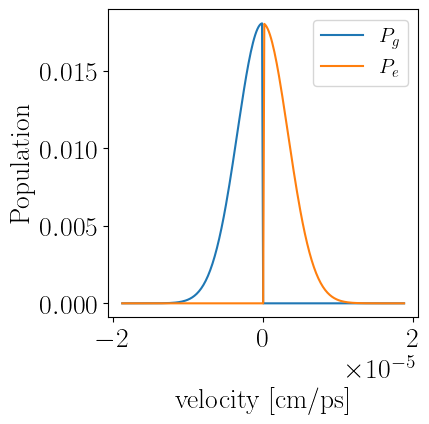

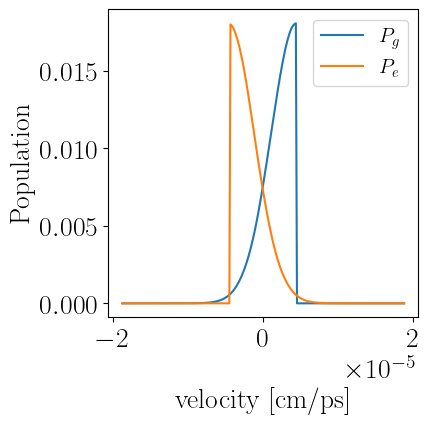

In [177]:
N = system.N_points
fig,ax = plt.subplots(figsize=(4,4))
#ax.plot(system.velocity_bins, np.asarray(result.expect)[0:N,0],label="initial",color="black")
ax.plot(system.velocity_bins, np.asarray(results[0].expect)[0:N,0],label=r"$P_g$")
ax.plot(system.velocity_bins, np.asarray(results[0].expect)[N:2*N,0],label=r"$P_e$")
ax.set_xlabel("velocity [cm/ps]",labelpad=25)
ax.set_ylabel("Population")
ax.legend(fontsize=15)
plt.show()
fig,ax = plt.subplots(figsize=(4,4))
#ax.plot(system.velocity_bins, np.asarray(result.expect)[0:N,0],label="initial",color="black")
ax.plot(system.velocity_bins, np.asarray(results[-1].expect)[0:N,-1],label=r"$P_g$")
ax.plot(system.velocity_bins, np.asarray(results[-1].expect)[N:2*N,-1],label=r"$P_e$")
ax.set_xlabel("velocity [cm/ps]",labelpad=25)
ax.set_ylabel("Population")
ax.legend(fontsize=15)
plt.show()

In [195]:
handler = data_handler()
stds = []
for state in saved:
    stds.append(handler.expect_standard_deviation(state,system.N_points))
    
# plt.plot(np.arange(len(stds)),stds)
# plt.ylabel(r"$\sigma [\hbar k]$")
# plt.xlabel("number of pulses")
# plt.plot(np.argmin(stds),np.amin(stds),'o',color="black")
# plt.show()
# print("minimum: {:.2f} after {} pulses".format(np.amin(stds),np.argmin(stds)))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.00443408 0.        ]
 [0.         0.00427683]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.4909566+0.j         -0.0123313-0.01317234j]
 [-0.0123313+0.01317234j  0.5090434+0.j        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.50901721+0.j         0.02120178-0.04955469j]
 [0.02120178+0.04955469j 0.49098279+0.j        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.49098245+0.j         0.03613084-0.08162823j]
 [0.03613084+0.08162823j 0.50901755+0.j        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.50907196+0.j         -0.08574239-0.08925373j]
 [-0.08574239+0.08925373j  0.49092804+0.j        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.49081

In [159]:
N_points = 125
system = Ps_system(N_atoms = 1,N_points = N_points)
sequence = laser_sequence()

system.init_distribution_singular()
system.init_states_ground()
system.create_composite()

N_pulses = 5
pulse_duration = 10 # ps
rabi0 = 2*np.pi*(1000e-3)
chirp = 2*np.pi*(300e-3)
direction = 1
for i in range(1,N_pulses+1):
    cooling_kwargs = {
        "label": "cooling"+str(i),
        "order":i,
        "rabi0":rabi0,
        "chirp":chirp,
        "detuning0":0,
        "pulse_duration":pulse_duration,
        "start": 0,
        "end":int(3*pulse_duration),
        "unit_wavevector": direction
    }
    sequence.init_pulse(cooling_kwargs)
    direction = -direction

In [160]:
sorted_sequence = sequence.pull_sorted_sequence()
opts = qt.Options(store_states=True)
states = system.states
saved = [states]
results = []
for laser in sorted_sequence:
    laser = laser[1]
    system.set_Hamiltonian_MT_general_laser(laser)
    result = qt.sesolve(tlist=laser.tlist,psi0=states,H=system.H,e_ops=system.e_ops,options=opts)
    states = result.states[-1]
    results.append(result)
    saved.append(states)

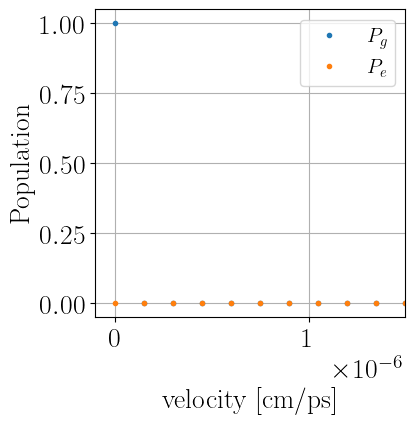

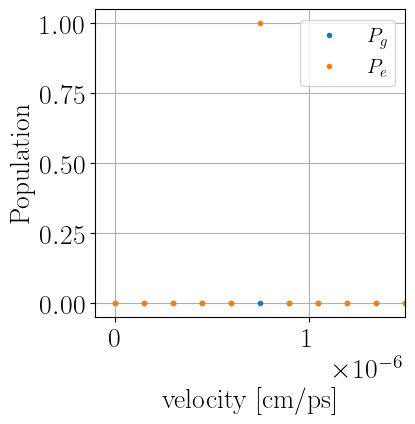

In [168]:
N = system.N_points
fig,ax = plt.subplots(figsize=(4,4))
#ax.plot(system.velocity_bins, np.asarray(result.expect)[0:N,0],label="initial",color="black")
ax.plot(system.velocity_bins, np.asarray(results[0].expect)[0:N,0],'.',label=r"$P_g$")
ax.plot(system.velocity_bins, np.asarray(results[0].expect)[N:2*N,0],'.',label=r"$P_e$")
ax.set_xlabel("velocity [cm/ps]",labelpad=25)
ax.set_ylabel("Population")
ax.set_xlim(-0.1e-6,1.5e-6)
plt.grid()
ax.legend(fontsize=15)
plt.show()
fig,ax = plt.subplots(figsize=(4,4))
#ax.plot(system.velocity_bins, np.asarray(result.expect)[0:N,0],label="initial",color="black")
ax.plot(system.velocity_bins, np.asarray(results[-1].expect)[0:N,-1],'.',label=r"$P_g$")
ax.plot(system.velocity_bins, np.asarray(results[-1].expect)[N:2*N,-1],'.',label=r"$P_e$")
ax.set_xlabel("velocity [cm/ps]",labelpad=25)
ax.set_xlim(-0.1e-6,1.5e-6)
ax.set_ylabel("Population")
ax.legend(fontsize=15)
plt.grid()
plt.show()

# Testing out desymmetrization pulse for cooling

In [246]:
N_points = 75
system = Ps_system(N_atoms = 1,N_points = N_points)
sequence = laser_sequence()
system.init_distribution_MB()
#system.init_distribution_flattop()
system.init_states_ground()
system.create_composite()

opt_desymmetry = krotov.result.Result().load("data/krotov/desymmetrization_blue_detuned.pkl")
tlist_desymmetry = opt_desymmetry.tlist
desymmetry_detuning = opt_desymmetry.optimized_controls[0]
desymmetry_envelope = opt_desymmetry.optimized_controls[2]
desymmetrization_kwargs = {
    "label":"desymmetrization",
    "order":0,
    "scale":1000,
    "envelope":desymmetry_envelope,
    "detuning":desymmetry_detuning,
    "unit_wavevector":1,
    "tlist":tlist_desymmetry
    }
sequence.init_pulse(desymmetrization_kwargs)

N_pulses = 0#30
pulse_duration = 10 # ps
rabi0 = 2*np.pi*(1000e-3)
chirp = 2*np.pi*(300e-3)
direction = -1
for i in range(1,N_pulses+1):
    cooling_kwargs = {
        "label": "cooling"+str(i),
        "order":i,
        "rabi0":rabi0,
        "chirp":chirp,
        "detuning0":0,
        "pulse_duration":pulse_duration,
        "start": 0,
        "end":int(3*pulse_duration),
        "unit_wavevector": direction
    }
    sequence.init_pulse(cooling_kwargs)
    direction = -direction

In [247]:
sorted_sequence = sequence.pull_sorted_sequence()
opts = qt.Options(store_states=True)
states = system.states
saved = [states]
results = []
for laser in sorted_sequence:
    laser = laser[1]
    system.set_Hamiltonian_MT_general_laser(laser)
    result = qt.sesolve(tlist=laser.tlist,psi0=states,H=system.H,e_ops=system.e_ops,options=opts)
    states = result.states[-1]
    results.append(result)
    saved.append(states)


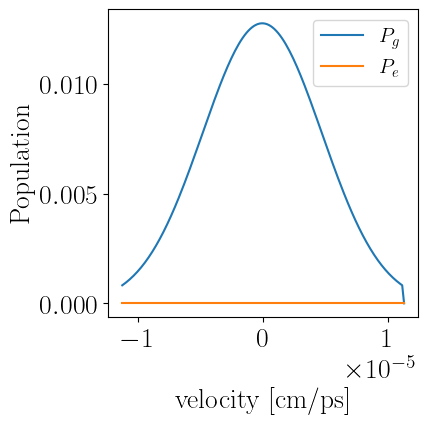

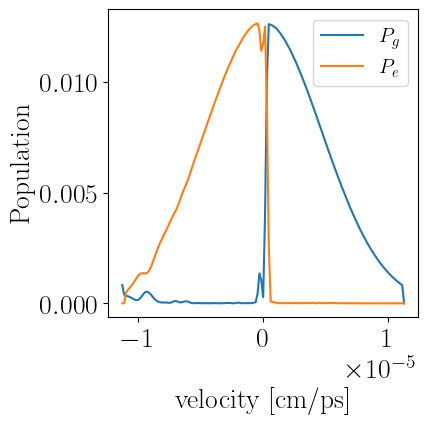

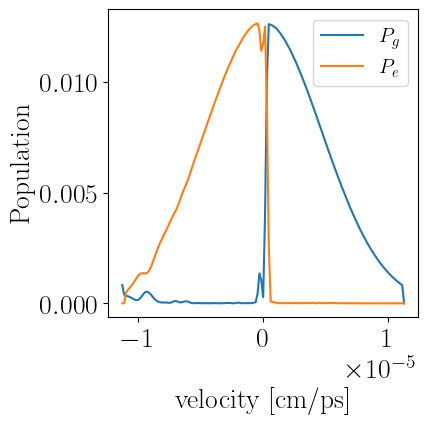

In [248]:

N = system.N_points
fig,ax = plt.subplots(figsize=(4,4))
#ax.plot(system.velocity_bins, np.asarray(result.expect)[0:N,0],label="initial",color="black")
ax.plot(system.velocity_bins, np.asarray(results[0].expect)[0:N,0],label=r"$P_g$")
ax.plot(system.velocity_bins, np.asarray(results[0].expect)[N:2*N,0],label=r"$P_e$")
ax.set_xlabel("velocity [cm/ps]",labelpad=25)
ax.set_ylabel("Population")
ax.legend(fontsize=15)
plt.show()
fig,ax = plt.subplots(figsize=(4,4))
#ax.plot(system.velocity_bins, np.asarray(result.expect)[0:N,0],label="initial",color="black")
ax.plot(system.velocity_bins, np.asarray(results[0].expect)[0:N,-1],label=r"$P_g$")
ax.plot(system.velocity_bins, np.asarray(results[0].expect)[N:2*N,-1],label=r"$P_e$")
ax.set_xlabel("velocity [cm/ps]",labelpad=25)
ax.set_ylabel("Population")
ax.legend(fontsize=15)
plt.show()
fig,ax = plt.subplots(figsize=(4,4))
#ax.plot(system.velocity_bins, np.asarray(result.expect)[0:N,0],label="initial",color="black")
ax.plot(system.velocity_bins, np.asarray(results[-1].expect)[0:N,-1],label=r"$P_g$")
ax.plot(system.velocity_bins, np.asarray(results[-1].expect)[N:2*N,-1],label=r"$P_e$")
ax.set_xlabel("velocity [cm/ps]",labelpad=25)
ax.set_ylabel("Population")
ax.legend(fontsize=15)
plt.show()

minimum: 18.03 after 25 pulses


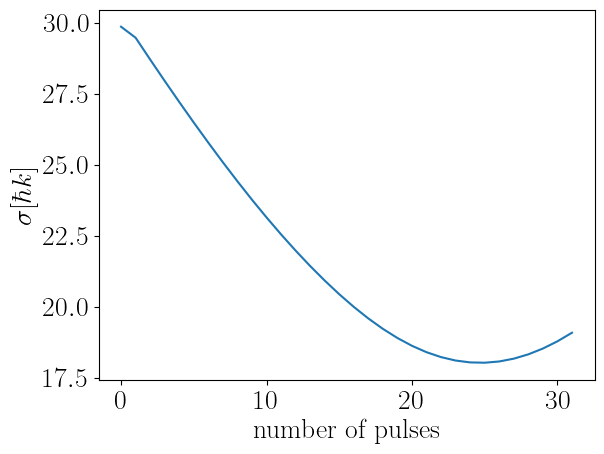

In [208]:
handler = data_handler()
stds = []
for state in saved:
    stds.append(handler.expect_standard_deviation(state,system.N_points))
plt.plot(np.arange(len(stds)),stds)
plt.ylabel(r"$\sigma [\hbar k]$")
plt.xlabel("number of pulses")
print("minimum: {:.2f} after {} pulses".format(np.amin(stds),np.argmin(stds)))

In [101]:
print(handler.expect_mean(saved[0],system.N_points))

1.0677222994637248e-15
